In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('udemy_courses.csv')
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


### EDA on Subject/Category

+ Subjects/Category
	- What is the distribution of subjects
	- How many courses per subject
	- Distribution of subjects per year
	- How many people purchase a particular subject
	- Which subject is the most popular

In [4]:
len(df['course_title'].unique())

3663

C:\Users\SIDDHANT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='subject', ylabel='count'>

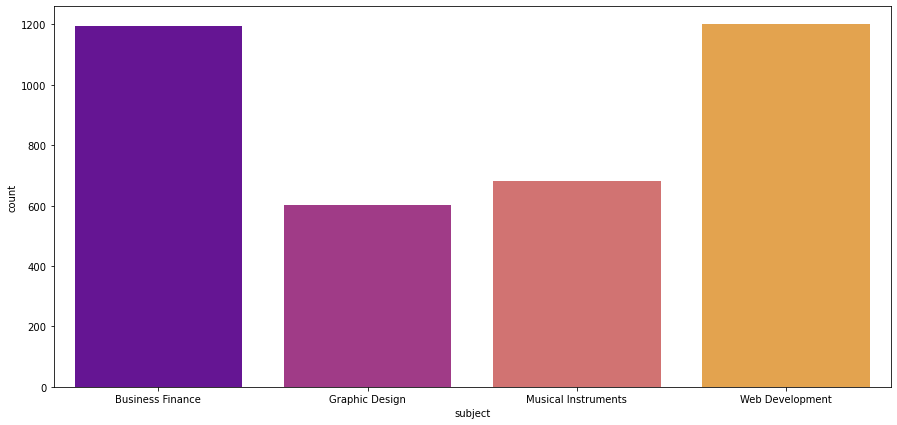

In [5]:
plt.figure(figsize=(15,7))
sn.countplot(df['subject'],palette='plasma')

In [6]:
df.subject.value_counts()

Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64

#### Insights:
    The Count of Subjects:
    Web Development is highest followed by business finance and others

### EDA on Subscribers
+ Subscribers
	- Which course have the highest number of subscribers
	- Average number of subscribers
	- Number of subscribers per Subject
	- Number of subscribers per year

In [7]:
df.groupby('subject')['num_subscribers'].count()

subject
Business Finance       1195
Graphic Design          603
Musical Instruments     680
Web Development        1200
Name: num_subscribers, dtype: int64

<AxesSubplot:ylabel='subject'>

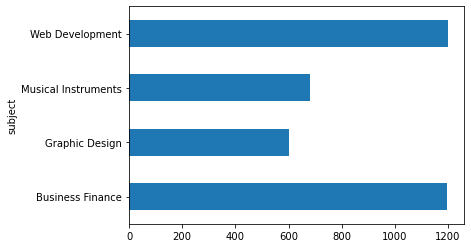

In [8]:
df.groupby('subject')['num_subscribers'].count().plot(kind = 'barh')

In [9]:
df.groupby('subject')['num_subscribers'].sum()

subject
Business Finance       1868711
Graphic Design         1063148
Musical Instruments     846689
Web Development        7980572
Name: num_subscribers, dtype: int64

<AxesSubplot:ylabel='subject'>

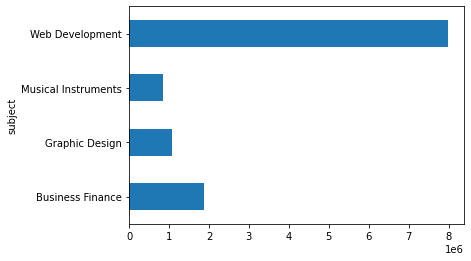

In [10]:
df.groupby('subject')['num_subscribers'].sum().plot(kind = 'barh')

#### Insights:
    The Count of Subcribers:
    Web Development is highest followed by business finance and others

## EDA on Levels

+ Levels
	- How many levels do we have
	- What is the distribution of courses per levels
	- Which subject have the highest levels
	- How many subscribers per levels
	- How many courses per levels

<AxesSubplot:>

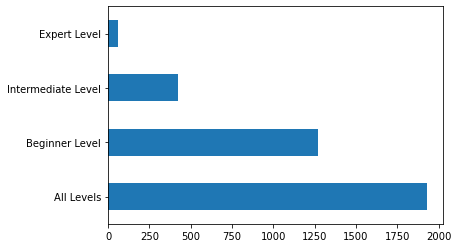

In [11]:
df['level'].value_counts().plot(kind = 'barh')

<AxesSubplot:ylabel='level'>

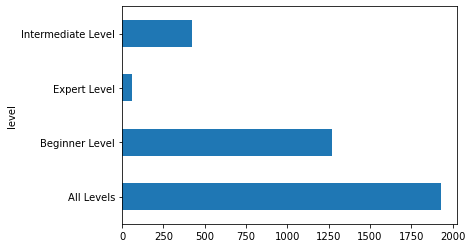

In [12]:
df.groupby(['level'])['num_subscribers'].count().plot(kind='barh')

<AxesSubplot:xlabel='level'>

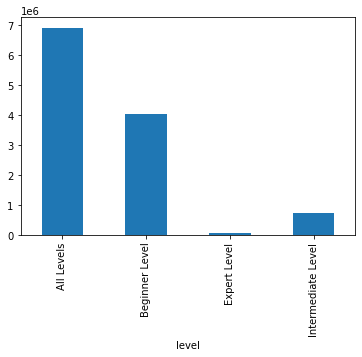

In [13]:
df.groupby(['level'])['num_subscribers'].sum().plot(kind = 'bar')

<AxesSubplot:xlabel='subject'>

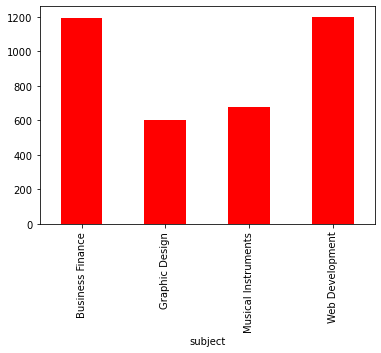

In [14]:
# How many levels per subject category

df.groupby(['subject'])['level'].count().plot(kind = 'bar',color = 'red')

C:\Users\SIDDHANT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='subject', ylabel='count'>

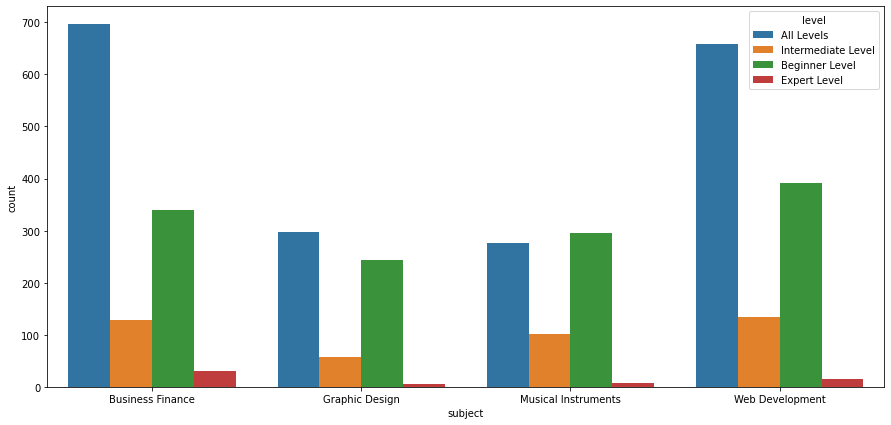

In [15]:
plt.figure(figsize=(15,7))
sn.countplot(df.subject, hue='level', data=df)


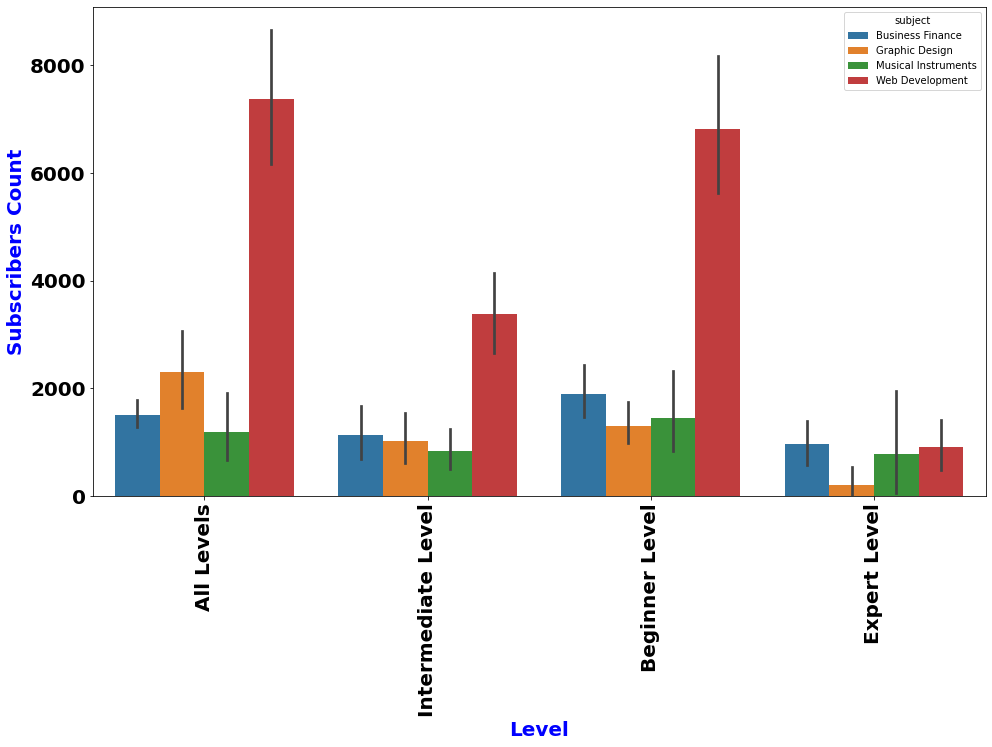

In [16]:
# number of levels and subscribers count

plt.figure(figsize=(16,9))
sn.barplot(x='level',y='num_subscribers', hue='subject',data=df)
plt.xticks(fontsize = 20,fontweight = 'bold')
plt.yticks(fontsize = 20,fontweight = 'bold')
plt.xlabel('Level',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.ylabel('Subscribers Count',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.xticks(rotation = 'vertical')
plt.show()

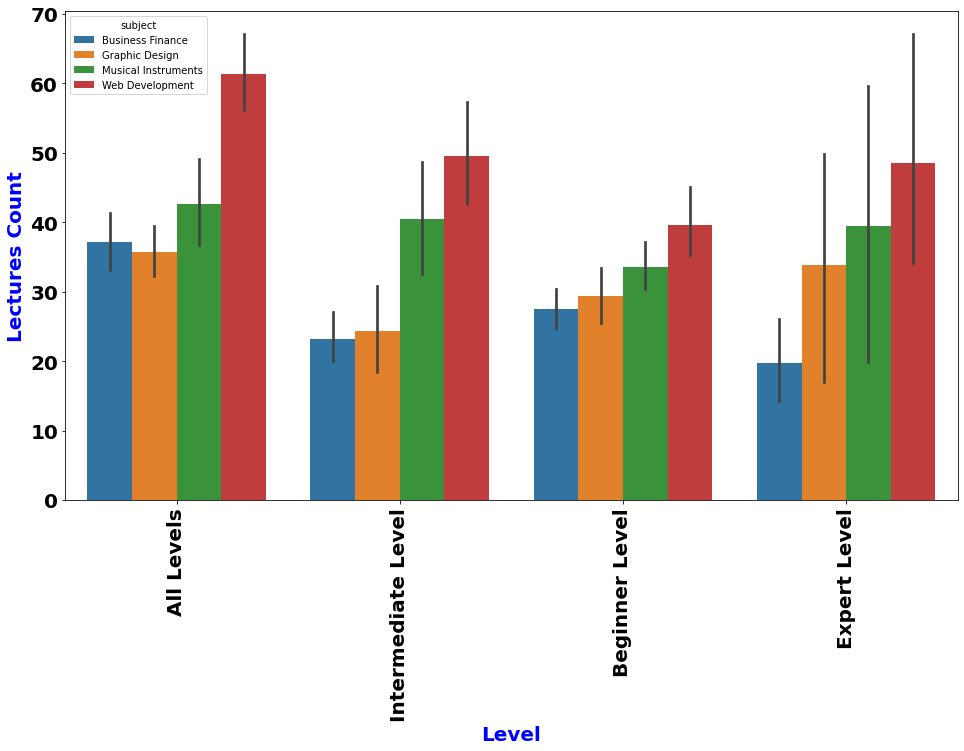

In [17]:
# number of levels and number of lectures count

plt.figure(figsize=(16,9))
sn.barplot(x='level',y='num_lectures', hue='subject',data=df)
plt.xticks(fontsize = 20,fontweight = 'bold')
plt.yticks(fontsize = 20,fontweight = 'bold')
plt.xlabel('Level',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.ylabel('Lectures Count',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.xticks(rotation = 'vertical')
plt.show()

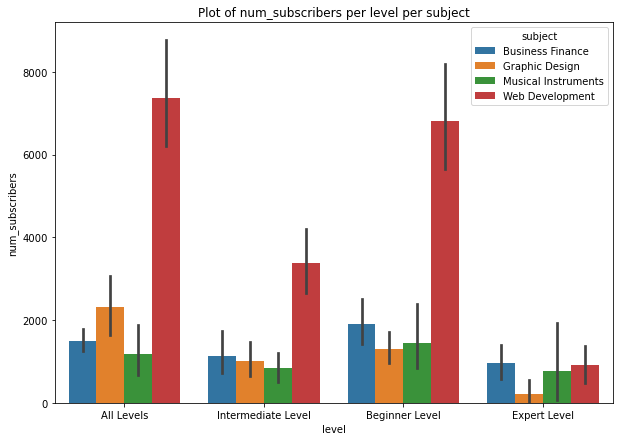

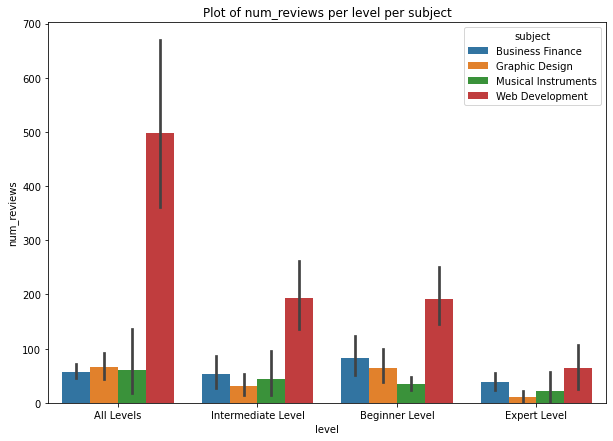

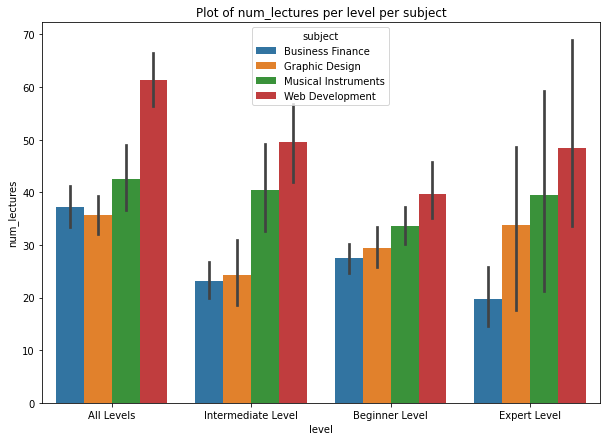

In [18]:
# reviews_level plot and lectures_level plot

def plotdata(df,feature):
    plt.figure(figsize=(10,7))
    plt.title("Plot of {} per level per subject".format(feature))
    sn.barplot(x = 'level',y = feature,data=df,hue = 'subject')
    plt.show()
    
    
featureslist = ['num_subscribers', 'num_reviews', 'num_lectures']
for feature in featureslist:
    plotdata(df,feature)

### EDA on Price
+ Price
	- What is the average price of a course
	- What is the min/max price
	- How much does Udemy earn
	- The most profitable courses

In [19]:
df.price.dtypes

dtype('int64')

In [20]:
df.price.astype('float')

0       200.0
1        75.0
2        45.0
3        95.0
4       200.0
        ...  
3673    100.0
3674     25.0
3675     40.0
3676     50.0
3677     45.0
Name: price, Length: 3678, dtype: float64

C:\Users\SIDDHANT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='count'>

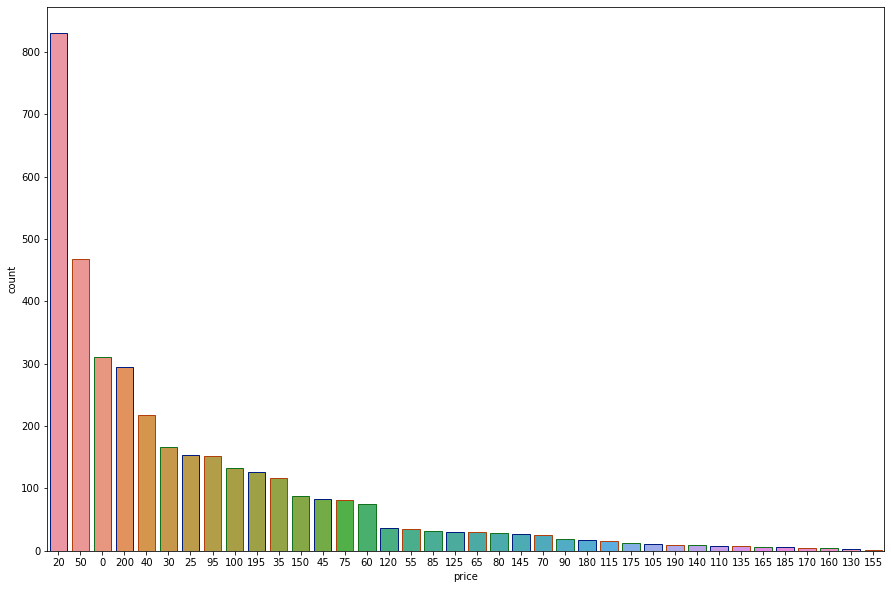

In [21]:
plt.figure(figsize=(15,10))
sn.countplot(df.price,order=df.price.value_counts().index,edgecolor=sn.color_palette("dark", 3) )

In [22]:
# What is the most profitable course
# price x num_subscriber

df['profit'] = df['price'] * df['num_subscribers']
df.head(3)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,429400
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,209400
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,97830


In [23]:
# The most profitable course
    
df[df['profit']==df['profit'].max()].style.background_gradient(cmap = 'plasma')

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,1,200,121584,27445,342,All Levels,43.000000,2015-11-02T21:13:27Z,Web Development,24316800


In [24]:
# The least profitable course,these may be free course
    
df[df['profit']==df['profit'].min()].style.background_gradient(cmap = 'plasma')

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit
95,1148774,Options Trading 101: The Basics,https://www.udemy.com/options-trading-101-the-basics/,0,0,1514,66,11,Beginner Level,0.550000,2017-03-23T22:19:57Z,Business Finance,0
103,133536,Stock Market Investing for Beginners,https://www.udemy.com/the-beginners-guide-to-the-stock-market/,0,0,50855,2698,15,Beginner Level,1.500000,2013-12-25T19:53:34Z,Business Finance,0
106,265960,Fundamentals of Forex Trading,https://www.udemy.com/fundamentals-of-forex-trading/,0,0,17160,620,23,All Levels,1.000000,2014-08-29T20:10:38Z,Business Finance,0
108,923616,Website Investing 101 - Buying & Selling Online Businesses,https://www.udemy.com/cash-flow-website-investing-buy-sell-online-businesses-digital-assets/,0,0,6811,151,51,All Levels,2.000000,2016-08-05T17:03:15Z,Business Finance,0
112,191854,Stock Market Foundations,https://www.udemy.com/how-to-invest-in-the-stock-market-beginners/,0,0,19339,794,9,Beginner Level,2.000000,2014-03-31T21:35:06Z,Business Finance,0
119,151668,Introduction to Financial Modeling,https://www.udemy.com/financial-modeling-asimplemodel/,0,0,29167,1463,8,Intermediate Level,1.500000,2014-05-27T16:22:16Z,Business Finance,0
128,777444,Corporate Finance - A Brief Introduction,https://www.udemy.com/finance-a-brief-introduction-and-basics-finance-101/,0,0,11724,649,17,Beginner Level,1.500000,2016-03-04T05:58:09Z,Business Finance,0
143,48841,Accounting in 60 Minutes - A Brief Introduction,https://www.udemy.com/accounting-in-60-minutes-a-brief-introduction/,0,0,56659,4397,16,Beginner Level,1.500000,2013-04-07T21:39:25Z,Business Finance,0
179,1188742,Introduction to Cryptocurrencies and Blockchain,https://www.udemy.com/introduction-to-cryptocurrencies/,0,0,3775,138,11,Beginner Level,2.000000,2017-05-01T21:18:54Z,Business Finance,0
193,919906,Trading Options For Consistent Returns: Options Basics,https://www.udemy.com/trading-options-for-income/,0,0,4077,281,20,Beginner Level,1.500000,2016-08-18T21:57:04Z,Business Finance,0


In [25]:
# Average profitable course

df[df['profit']>=df['profit'].mean()].style.background_gradient(cmap = 'plasma')

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-banking-course/,1,200,2147,23,51,All Levels,1.500000,2017-01-18T20:58:58Z,Business Finance,429400
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-profits-trading-options/,1,200,1276,45,26,Intermediate Level,2.000000,2016-12-13T14:57:18Z,Business Finance,255200
5,192870,Trading Penny Stocks: A Guide for All Levels In 2017,https://www.udemy.com/trading-penny-stocks-a-guide-for-all-levels/,1,150,9221,138,25,All Levels,3.000000,2014-05-02T15:13:30Z,Business Finance,1383150
7,403100,"Trading Stock Chart Patterns For Immediate, Explosive Gains",https://www.udemy.com/trading-chart-patterns-for-immediate-explosive-gains/,1,95,2917,148,23,All Levels,2.500000,2015-01-30T22:13:03Z,Business Finance,277115
8,476268,Options Trading 3 : Advanced Stock Profit and Success Method,https://www.udemy.com/day-trading-stock-options-3/,1,195,5172,34,38,Expert Level,2.500000,2015-05-28T00:14:03Z,Business Finance,1008540
10,592338,Forex Trading Secrets of the Pros With Amazon's AWS,https://www.udemy.com/trading-with-amazons-aws-servers-trade-secrets-of-the-pros/,1,200,4284,93,76,All Levels,5.000000,2015-09-11T16:47:02Z,Business Finance,856800
11,975046,Trading Options With Money Flow,https://www.udemy.com/trading-options-using-money-flow/,1,200,1380,42,17,All Levels,1.000000,2016-10-18T22:52:31Z,Business Finance,276000
13,794151,Forex Trading Course: Work Smarter Not Harder Proven Results,https://www.udemy.com/the-complete-trading-course/,1,195,4061,52,16,All Levels,2.000000,2016-03-16T15:40:19Z,Business Finance,791895
17,564966,The Complete Chart Pattern Trading Course: A Proven Approach,https://www.udemy.com/make-money-trading-stocks-from-home/,1,200,2666,115,52,All Levels,4.000000,2015-08-10T21:07:35Z,Business Finance,533200
18,606928,7 Deadly Mistakes of Investing that Will Slash Your Profits!,https://www.udemy.com/7-deadly-mistakes-of-investing/,1,50,5354,24,23,All Levels,1.500000,2015-09-21T18:10:34Z,Business Finance,267700


In [26]:
### How Many Courses on Udemy Are paid or free

df['is_paid'].unique()

array([ True, False])

In [27]:
df['is_paid'].value_counts()

True     3368
False     310
Name: is_paid, dtype: int64

<AxesSubplot:xlabel='is_paid', ylabel='count'>

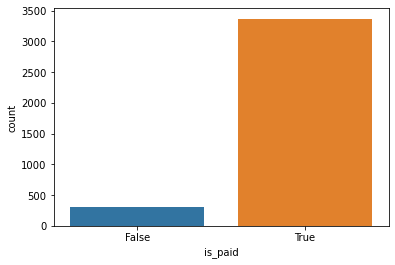

In [28]:
sn.countplot(x = 'is_paid',data=df,)

In [29]:
df.groupby(['is_paid'])['subject'].value_counts()

is_paid  subject            
False    Web Development         133
         Business Finance         96
         Musical Instruments      46
         Graphic Design           35
True     Business Finance       1099
         Web Development        1067
         Musical Instruments     634
         Graphic Design          568
Name: subject, dtype: int64

<AxesSubplot:xlabel='is_paid,subject'>

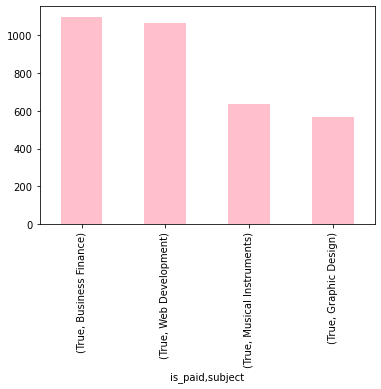

In [30]:
# paid courses with subjects

df[df['is_paid']==True].groupby(['is_paid'])['subject'].value_counts().plot(kind = 'bar',color = 'pink')

<AxesSubplot:xlabel='is_paid,subject'>

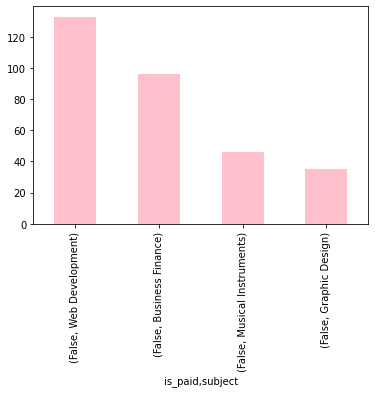

In [31]:
# free courses with subjects

df[df['is_paid']==False].groupby(['is_paid'])['subject'].value_counts().plot(kind = 'bar',color = 'pink')

### Correlation Question
+ Correlation Questions
	- Does number of subscribers depend on
	- number of reviews
	- price
	- number of lectures
	- content duration

In [32]:
df.sample(4)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit
2075,504168,Learn Flute FAST!,https://www.udemy.com/learn-flute-fast/,True,45,249,33,61,Beginner Level,4.0,2015-06-02T19:50:16Z,Musical Instruments,11205
1979,238934,Pianoforall - Incredible New Way To Learn Pian...,https://www.udemy.com/pianoforall-incredible-n...,True,200,75499,7676,362,All Levels,30.0,2014-08-07T06:27:51Z,Musical Instruments,15099800
786,1231958,60 Minutes to Fundamental Accounting Skills,https://www.udemy.com/60-minute-fundamental-ac...,True,75,0,0,9,Beginner Level,2.5,2017-06-28T21:55:29Z,Business Finance,0
454,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.5,2017-04-23T16:19:01Z,Business Finance,0


In [33]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'profit'],
      dtype='object')

<AxesSubplot:xlabel='price', ylabel='num_subscribers'>

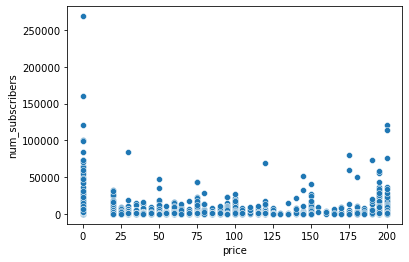

In [34]:
sn.scatterplot(data=df,x='price',y='num_subscribers')

<AxesSubplot:xlabel='price', ylabel='num_reviews'>

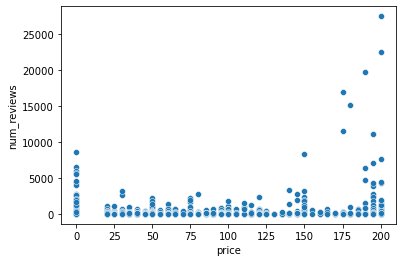

In [35]:
sn.scatterplot(data=df,x = 'price',y = 'num_reviews')

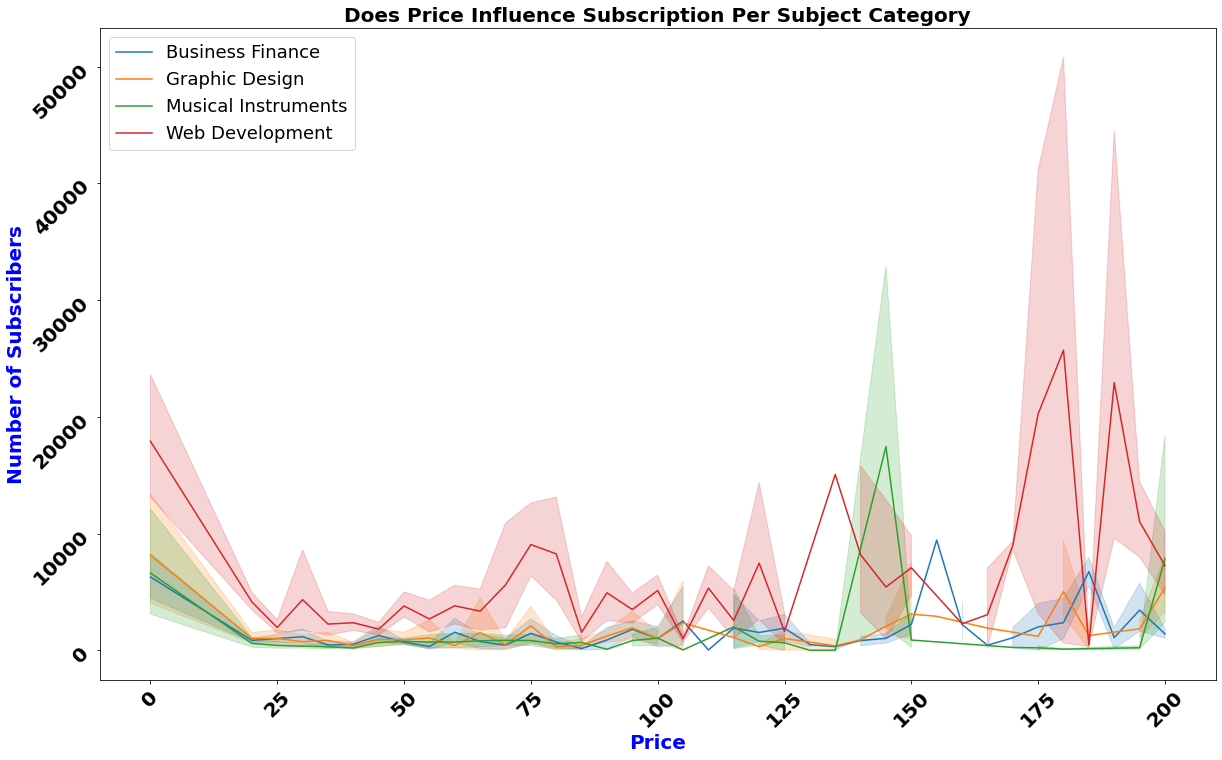

In [36]:
plt.figure(figsize=(20,12))
plt.title("Does Price Influence Subscription Per Subject Category",
         fontsize = 20,fontweight = 'bold')

sn.lineplot(data=df,x='price',y='num_subscribers',hue='subject')

plt.xticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.yticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.xlabel('Price',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.ylabel('Number of Subscribers',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.legend(fontsize=18,loc='upper left' )
plt.show()


<div class="text_cell_render border-box-sizing rendered_html">
<h3>Question on Time<a class="anchor-link" href="#Question-on-Time">¶</a>
</h3>
<ul>
<li>Published Year<ul>
<li>Number of courses per year</li>
<li>Distribution of subjects per year</li>
<li>Which year has the highest number of courses</li>
<li>What is the trend of courses per year</li>
</ul>
</li>
</ul>

</div>

In [37]:
df['published_timestamp'].head()

0    2017-01-18T20:58:58Z
1    2017-03-09T16:34:20Z
2    2016-12-19T19:26:30Z
3    2017-05-30T20:07:24Z
4    2016-12-13T14:57:18Z
Name: published_timestamp, dtype: object

In [38]:
# we need to extract year,month,date from the published timestamp

# so for that i will extract the year-month-date from the timestamp 

df['published_date'] = df['published_timestamp'].apply(lambda x:x.split('T')[0])

In [39]:
df.head(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,429400,2017-01-18
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,209400,2017-03-09


In [40]:
# converting the published date to pandas datetime object

df['published_date'] = pd.to_datetime(df['published_date'],format="%Y-%m-%d")

In [41]:
df['Year'] = df['published_date'].dt.year

df['Month'] = df['published_date'].dt.month

df['Day'] = df['published_date'].dt.day

df['Month_name'] = df['published_date'].dt.month_name()


df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,Year,Month,Day,Month_name
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,429400,2017-01-18,2017,1,18,January
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,209400,2017-03-09,2017,3,9,March
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,97830,2016-12-19,2016,12,19,December
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,232845,2017-05-30,2017,5,30,May
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,255200,2016-12-13,2016,12,13,December


In [42]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'profit',
       'published_date', 'Year', 'Month', 'Day', 'Month_name'],
      dtype='object')

Text(0, 0.5, 'Profit')

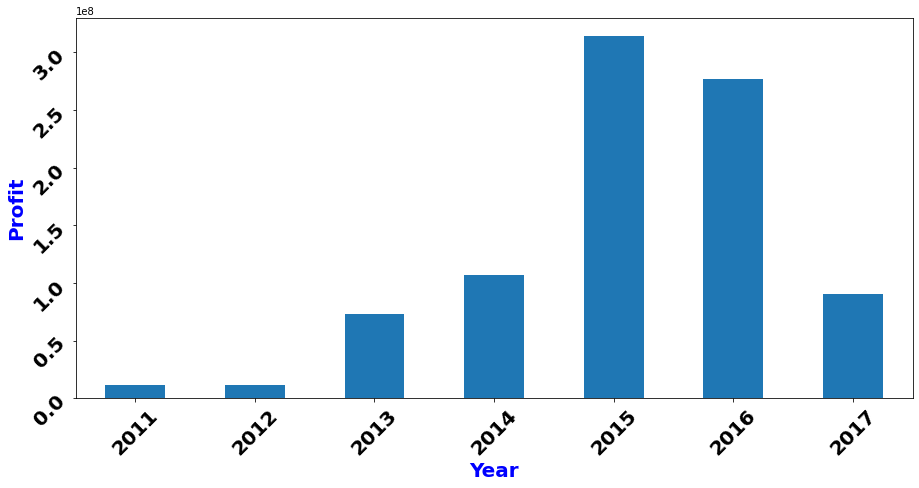

In [43]:
# profit year wise

plt.figure(figsize=(15,7))
df.groupby(['Year'])['profit'].sum().plot(kind = 'bar')
plt.xticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.yticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.xlabel('Year',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.ylabel('Profit',fontsize = 20,fontweight = 'bold',
           color = 'blue')

Text(0, 0.5, 'Profit')

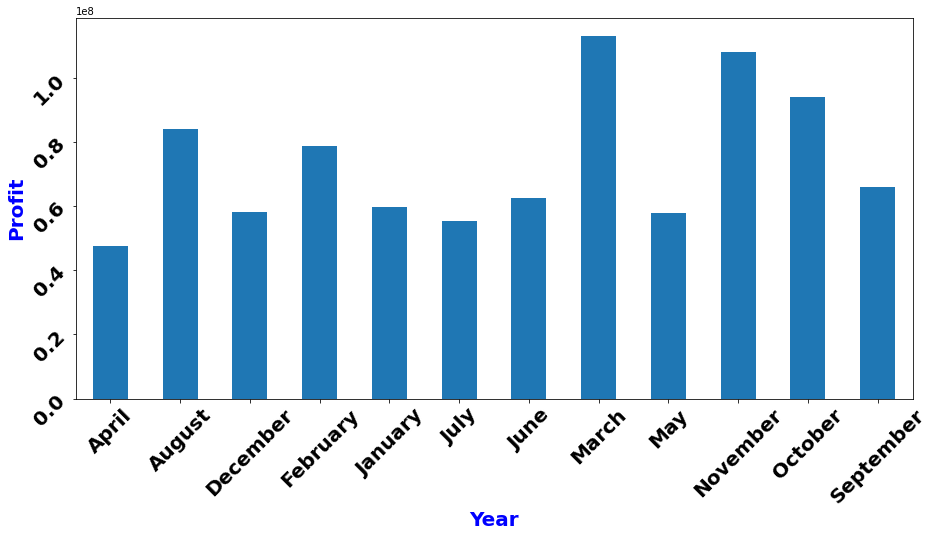

In [44]:
# profit month wise

plt.figure(figsize=(15,7))
df.groupby(['Month_name'])['profit'].sum().plot(kind = 'bar')
plt.xticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.yticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.xlabel('Year',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.ylabel('Profit',fontsize = 20,fontweight = 'bold',
           color = 'blue')

Text(0, 0.5, 'Number of Subscribers')

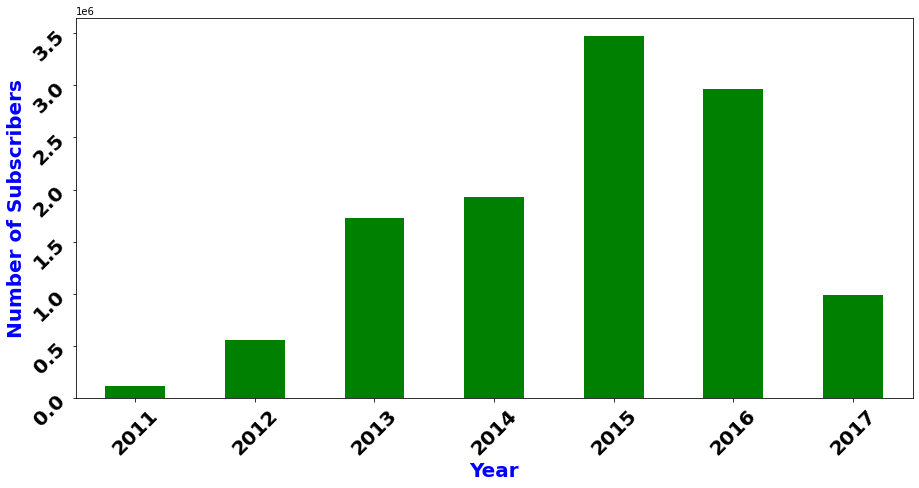

In [45]:
# number of subscribers per year

plt.figure(figsize=(15,7))
df.groupby(['Year'])['num_subscribers'].sum().plot(kind = 'bar',color = 'green')

plt.xticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.yticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.xlabel('Year',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.ylabel('Number of Subscribers',fontsize = 20,fontweight = 'bold',
           color = 'blue')

Text(0, 0.5, 'Number of Subscribers')

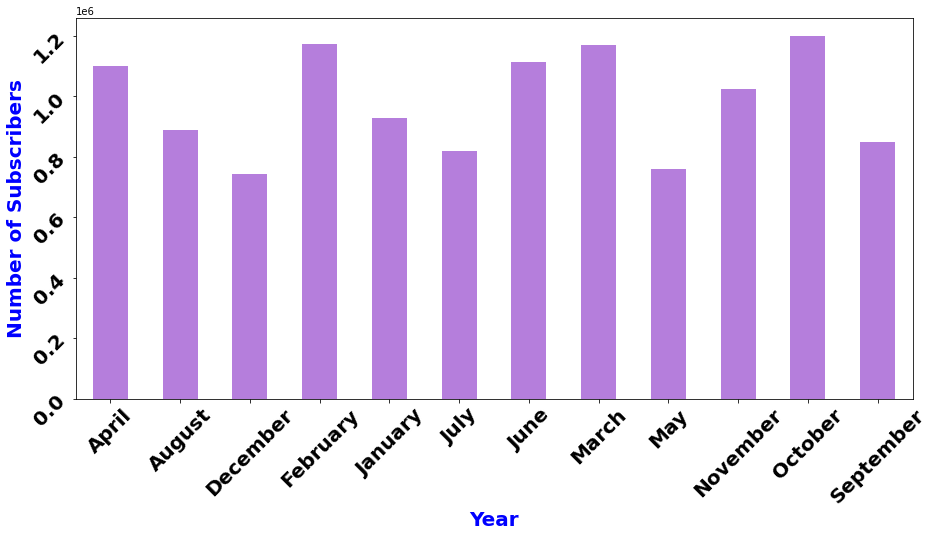

In [46]:
# number of subscribers month wise

plt.figure(figsize=(15,7))
df.groupby(['Month_name'])['num_subscribers'].sum().plot(kind = 'bar',
                                                         color = '#b57edc')

plt.xticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.yticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.xlabel('Year',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.ylabel('Number of Subscribers',fontsize = 20,fontweight = 'bold',
           color = 'blue')

<div class="text_cell_render border-box-sizing rendered_html">
<h4>Questions on Course Title<a class="anchor-link" href="#Questions-on-Course-Title">¶</a>
</h4>
<ul>
<li>Course Title<ul>
<li>What is the most frequent words in course title</li>
<li>Longest/Shortest course title</li>
<li>How can we build recommendation systems via title using similarity</li>
<li>Most famous courses by number of subscribers</li>
</ul>
</li>
</ul>

</div>

In [47]:
# course with maximum length

df[df['course_title'].str.len()==max(df['course_title'].str.len())]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,Year,Month,Day,Month_name
2186,286898,Aprende a tocar el Acordeón 'de oído y con téc...,https://www.udemy.com/aprende-los-secretos-de-...,True,75,158,17,59,All Levels,2.5,2014-07-28T13:55:43Z,Musical Instruments,11850,2014-07-28,2014,7,28,July


In [48]:
df['course_title'].iloc[2186]

'Aprende a tocar el Acordeón \'de oído y con técnica",https://www.udemy.com/aprende-a-tocar-el-acordeon-de-oido-y-con-tecnica/,true,25,93,21,34,Beginner Level,4 hours,2014-09-16T19:51:45Z\n263432,Aprende los Secretos de la Armónica con HARP&SOUL"'

In [49]:
# most reviewed course

df[df['num_reviews']==max(df['num_reviews'])]



,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,Year,Month,Day,Month_name
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43.0,2015-11-02T21:13:27Z,Web Development,24316800,2015-11-02,2015,11,2,November


In [50]:
# course with maximum length

df[df['course_title'].str.len()==min(df['course_title'].str.len())]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,Year,Month,Day,Month_name
1324,1164570,调色高级讲解,https://www.udemy.com/dezepioy/,True,200,4,2,8,Beginner Level,1.0,2017-03-31T17:16:15Z,Graphic Design,800,2017-03-31,2017,3,31,March
1670,1164720,调色中级课程,https://www.udemy.com/ixlnjjvn/,True,200,5,3,7,Beginner Level,1.0,2017-03-31T17:19:38Z,Graphic Design,1000,2017-03-31,2017,3,31,March


In [51]:
# Text Cleaning to remove stopwords
import neattext.functions as nfx

In [52]:
# removing all the stopwords

df['Clean_title'] = df['course_title'].apply(nfx.remove_shortwords)
df['Clean_title'].iloc[1:5]

1    Complete Course Certification Grow Your Practice
2    Financial Modeling Business Analysts Consultants
3              Beginner Financial Analysis Excel 2017
4               Maximize Your Profits Trading Options
Name: Clean_title, dtype: object

In [53]:
# head on head comparision

temp = df[['Clean_title','course_title']]

temp.head()

,Clean_title,course_title
0,Ultimate Investment Banking Course,Ultimate Investment Banking Course
1,Complete Course Certification Grow Your Practice,Complete GST Course & Certification - Grow You...
2,Financial Modeling Business Analysts Consultants,Financial Modeling for Business Analysts and C...
3,Beginner Financial Analysis Excel 2017,Beginner to Pro - Financial Analysis in Excel ...
4,Maximize Your Profits Trading Options,How To Maximize Your Profits Trading Options


In [54]:
# finding the maximum length of the clean title

temp[temp['Clean_title'].str.len()==max(temp['Clean_title'].str.len())]

,Clean_title,course_title
291,Multiply your returns using Value Investing ht...,"Multiply your returns using 'Value Investing"",..."


In [55]:
temp['Clean_title'].iloc[291]


'Multiply your returns using Value Investing https udemy multiply your returns using value investing true 1942 Levels hours 2015 23T00 874284 Weekly Forex Analysis Baraq'

In [56]:
# we can observe special characters in clean title,we'll remove them

df['Clean_title'] = df['Clean_title'].apply(nfx.remove_special_characters)
df['Clean_title'].iloc[1:5]

1    Complete Course Certification Grow Your Practice
2    Financial Modeling Business Analysts Consultants
3              Beginner Financial Analysis Excel 2017
4               Maximize Your Profits Trading Options
Name: Clean_title, dtype: object

In [57]:
# tokenisation

all_title_list = df['Clean_title'].to_list()

all_title_list[1:5]

['Complete Course Certification Grow Your Practice',
 'Financial Modeling Business Analysts Consultants',
 'Beginner Financial Analysis Excel 2017',
 'Maximize Your Profits Trading Options']

In [58]:
alltokens = [token for line in all_title_list for token in line.split()]

print(len(alltokens))

print(alltokens[1:4])

18205
['Investment', 'Banking', 'Course']


In [59]:
## top50 frequently used words 

from collections import Counter

freq_words = dict(Counter(alltokens).most_common(50))

freq_words

{'Learn': 495,
 'Trading': 281,
 'with': 278,
 'Course': 235,
 'Beginners': 235,
 'Guitar': 211,
 'Design': 189,
 'Complete': 181,
 'Piano': 179,
 'Photoshop': 169,
 'Forex': 165,
 'Build': 164,
 'Financial': 138,
 'Beginner': 138,
 'Create': 136,
 'JavaScript': 124,
 'Your': 119,
 'HTML': 118,
 'Guide': 116,
 'Accounting': 112,
 'Website': 111,
 'from': 111,
 'Development': 110,
 'Options': 101,
 'From': 101,
 'Play': 100,
 'Adobe': 100,
 'With': 99,
 'Introduction': 93,
 'Master': 92,
 'Illustrator': 90,
 'Basics': 88,
 'Scratch': 83,
 'WordPress': 83,
 'Level': 80,
 'Professional': 79,
 'Analysis': 77,
 'Advanced': 77,
 'Easy': 76,
 'Lessons': 73,
 'HTML5': 68,
 'Trade': 66,
 'Stock': 65,
 'Bootstrap': 64,
 'Business': 62,
 'play': 61,
 'Angular': 58,
 'Building': 56,
 'Stocks': 55,
 'Wordpress': 55}

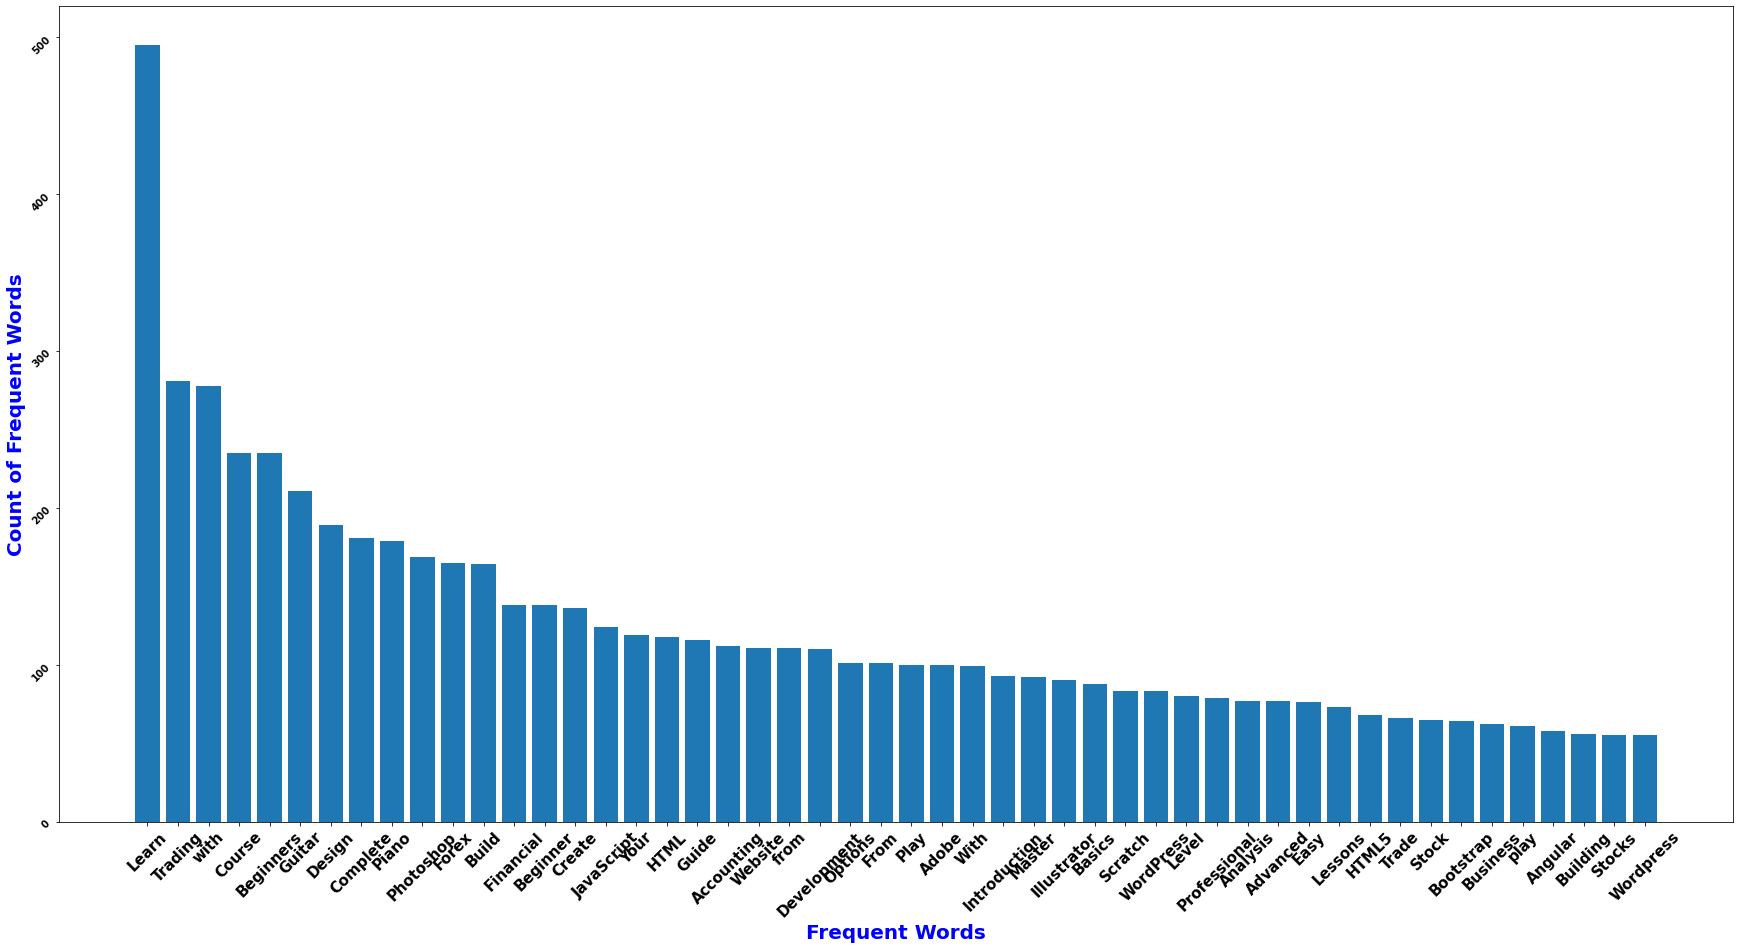

In [60]:
plt.figure(figsize=(30,15))
plt.bar(*zip(*freq_words.items()))
plt.xticks(rotation = 45)

plt.xticks(fontsize = 15,fontweight = 'bold',rotation = 45)
plt.yticks(fontsize = 10,fontweight = 'bold',rotation = 45)
plt.xlabel('Frequent Words',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.ylabel('Count of Frequent Words',fontsize = 20,fontweight = 'bold',
           color = 'blue')

plt.show()

Important Insights from Exploratory data analysis:

* Web devlopment cources seems to be popular and in demand
* levels like 'All Levels' is having highest count
* Courses of price 20 is having highest purchases followed by 50, 200 price.